# Preparation of biased coexsistence simulations

In [2]:
import numpy as np, sys, os, glob
import matplotlib.pylab as plt
import MDAnalysis

In [15]:
standard_sim=os.path.abspath('template')
pressure=[f.split('/')[-1].replace('atm.data','').replace('water_','') for f in glob.glob('../4-PrepareCoexistenceConfiguration/COEX_BOXES/*')]
print(pressure)

['1000', '4000', '3000', '2000']


In [31]:
sims = dict()
for a in pressure:
    fold='COEX_{}atm/template/'.format(a)
    sims[fold] = dict()
    sims[fold]['p']=float(a)
    os.system('mkdir -p {}'.format(fold))
    os.system('cp -r template/* {}'.format(fold))
    os.system('cp -r ../4-PrepareCoexistenceConfiguration/COEX_BOXES/water_{}atm.data {}/water.data'.format(a,fold))
    os.system('sed -i ""   "s#variable .* pressure .*#variable        pressure equal {}#g" {}/in.pressure'.format(a,fold))


### Setup different temperatures

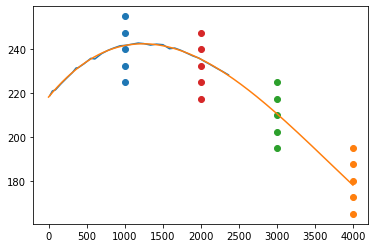

In [44]:
tip4p_vega_data=np.genfromtxt('../2-Bulk/IceII_liquid_tip4p_pd.dat')
#tip4p_vega_data=np.loadtxt('IceII_liquid_tip4p_pd.dat')
tip4p_vega_data[:,0]+=20 #Add 20K to adjust from tip4p to tip4p/ice                                                                                                                                
tip4p_vega_data[:,1]+=tip4p_vega_data[:,1]*0.986923 # to atm                                                                                                                                             
tip4p_vega_data=tip4p_vega_data[np.argsort(tip4p_vega_data[:,1])]
melt_fn = np.poly1d(np.polyfit(tip4p_vega_data[:,1], tip4p_vega_data[:,0], 3))

Ps=np.linspace(0,4000,200)
plt.plot(tip4p_vega_data[:,1],tip4p_vega_data[:,0])
plt.plot(Ps,melt_fn(Ps))

for fold in sims.keys():
    p=sims[fold]['p']
    T_m=melt_fn(p)
    T_range=np.round((T_m+np.arange(-15,22.5,7.5))/7.5, decimals=0)*7.5
    plt.scatter(p+T_range*0,T_range)#,marker='^')
    sims[fold]['temps']=T_range




In [34]:
for fold in sims.keys():
    sim=sims[fold]
    for t in sim['temps']:
        temp_fold = '{}{}K'.format(fold.replace('template',''),t)
        cmd='mkdir -p {}\n'.format(temp_fold)
        cmd+='cp {}/* {}/\n'.format(fold,temp_fold)
        cmd+='sed -i ""  \"s#variable.*temperature.*#variable        temperature equal {}#g\" {}/in.temp\n'.format(t,temp_fold)
        cmd+='sed -i "" \"s#TEMP=300#TEMP={}#g\" {}/plumed*.dat'.format(t,temp_fold)
        
        #cmd+='sed -i \"s#variable.*temperature.*#variable        temperature equal {}#g\" {}/in.temp'.format(t,temp_fold)
        print(cmd)
        os.system(cmd)

mkdir -p COEX_1000atm//235.0K
cp COEX_1000atm/template//* COEX_1000atm//235.0K/
sed -i ""  "s#variable.*temperature.*#variable        temperature equal 235.0#g" COEX_1000atm//235.0K/in.temp
sed -i "" "s#TEMP=300#TEMP=235.0#g" COEX_1000atm//235.0K/plumed*.dat
mkdir -p COEX_1000atm//240.0K
cp COEX_1000atm/template//* COEX_1000atm//240.0K/
sed -i ""  "s#variable.*temperature.*#variable        temperature equal 240.0#g" COEX_1000atm//240.0K/in.temp
sed -i "" "s#TEMP=300#TEMP=240.0#g" COEX_1000atm//240.0K/plumed*.dat
mkdir -p COEX_1000atm//245.0K
cp COEX_1000atm/template//* COEX_1000atm//245.0K/
sed -i ""  "s#variable.*temperature.*#variable        temperature equal 245.0#g" COEX_1000atm//245.0K/in.temp
sed -i "" "s#TEMP=300#TEMP=245.0#g" COEX_1000atm//245.0K/plumed*.dat
mkdir -p COEX_1000atm//250.0K
cp COEX_1000atm/template//* COEX_1000atm//250.0K/
sed -i ""  "s#variable.*temperature.*#variable        temperature equal 250.0#g" COEX_1000atm//250.0K/in.temp
sed -i "" "s#TEMP=300#TEMP=250.0#

### Convert notebook to python script

In [49]:
!jupyter nbconvert --to script Prepare_coexsistence.ipynb
!sed -i '' 's/""//g' Prepare_coexsistence.py


[NbConvertApp] Converting notebook Prepare_coexsistence.ipynb to script
[NbConvertApp] Writing 4427 bytes to Prepare_coexsistence.py
